In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import numpy as np
import pandas as pd

data=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/딥러닝 term project/feature_aihub.csv')
data

,Unnamed: 0,파일경로,파일명,상하의,스타일,색상,소재,핏
0,1002016.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1002016_2,상의,탑,베이지,우븐,루즈
1,1002026.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1002026_2,상의,탑,베이지,우븐,루즈
2,1003373.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1003373_2,상의,블라우스,레드,스웨이드,노멀
3,1003515.jpg_1,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1003515_1,하의,스커트,오렌지,스웨이드,노멀
4,1003515.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1003515_2,상의,니트웨어,베이지,니트,노멀
...,...,...,...,...,...,...,...,...
24624,998311.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,998311_2,상의,티셔츠,퍼플,저지,오버사이즈
24625,998321.jpg_1,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,998321_1,하의,팬츠,퍼플,저지,루즈
24626,998321.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,998321_2,상의,티셔츠,퍼플,저지,오버사이즈
24627,998331.jpg_1,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,998331_1,하의,팬츠,퍼플,저지,루즈


상의 카테고리 전처리

In [4]:
data_top = data[data['상하의']=="상의"]
display(data_top)

,Unnamed: 0,파일경로,파일명,상하의,스타일,색상,소재,핏
0,1002016.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1002016_2,상의,탑,베이지,우븐,루즈
1,1002026.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1002026_2,상의,탑,베이지,우븐,루즈
2,1003373.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1003373_2,상의,블라우스,레드,스웨이드,노멀
4,1003515.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1003515_2,상의,니트웨어,베이지,니트,노멀
5,1004291.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1004291_2,상의,니트웨어,베이지,니트,노멀
...,...,...,...,...,...,...,...,...
24621,998251.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,998251_2,상의,탑,실버,저지,노멀
24622,998301.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,998301_2,상의,티셔츠,블루,저지,오버사이즈
24624,998311.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,998311_2,상의,티셔츠,퍼플,저지,오버사이즈
24626,998321.jpg_2,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,998321_2,상의,티셔츠,퍼플,저지,오버사이즈


In [ ]:
print(data_top['스타일'].value_counts())

블라우스    6235
티셔츠     2468
니트웨어    2052
탑       1261
셔츠      1066
후드티      190
브라탑       91
Name: 스타일, dtype: int64


In [ ]:
print(data_top['핏'].value_counts())

노멀       7334
루즈       4091
타이트      1579
오버사이즈     359
Name: 핏, dtype: int64


In [ ]:
print(data_top['스타일'].unique())
print(data_top['핏'].unique())

['탑' '블라우스' '니트웨어' '셔츠' '티셔츠' '브라탑' '후드티']
['루즈' '노멀' '오버사이즈' '타이트']


In [6]:
style_dict={}
fit_dict={}
idx=0

for style in data_top['스타일'].unique():
  style_dict[style]=idx
  idx+=1

idx=0
for fit in data_top['핏'].unique():
  fit_dict[fit]=idx
  idx+=1

print(style_dict)
print(fit_dict)

{'탑': 0, '블라우스': 1, '니트웨어': 2, '셔츠': 3, '티셔츠': 4, '브라탑': 5, '후드티': 6}
{'루즈': 0, '노멀': 1, '오버사이즈': 2, '타이트': 3}


In [ ]:
top_X=data_top['파일경로']
y_style=data_top['스타일']
y_fit=data_top['핏']

In [ ]:
from sklearn.model_selection import train_test_split
x_trn, x_vld, y_trn, y_vld = train_test_split(top_X, y_style, random_state=66, test_size=0.2,stratify= y_style)

In [ ]:
top_train=data_top.loc[x_trn.index,['파일경로','스타일','핏']]
top_val=data_top.loc[x_vld.index,['파일경로','스타일','핏']]

In [ ]:
top_train['스타일']=top_train['스타일'].map(style_dict)
top_val['스타일']=top_val['스타일'].map(style_dict)

top_train['핏']=top_train['핏'].map(fit_dict)
top_val['핏']=top_val['핏'].map(fit_dict)

In [ ]:
display(top_train)
display(top_val)

,파일경로,스타일,핏
2336,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1,0
15699,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1,1
15484,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,3,0
15937,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,2,0
17354,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1,3
...,...,...,...
20745,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1,0
18373,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1,1
2670,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,2,1
19972,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1,1


,파일경로,스타일,핏
14333,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1,1
15275,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,2,0
20240,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1,1
22576,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,4,0
13309,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1,0
...,...,...,...
21243,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1,1
10232,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,2,1
21916,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,1,0
23771,/content/gdrive/MyDrive/Colab Notebooks/딥러ᄂ...,0,1


전체 데이터 학습용 map

In [7]:
data_top['스타일']=data_top['스타일'].map(style_dict)
data_top['핏']=data_top['핏'].map(fit_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


스타일, 핏 generator

In [ ]:
from pandas.core.dtypes.cast import maybe_infer_to_datetimelike
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_dataframe(top_train,
                                                 target_size = (100, 100),
                                                 x_col='파일경로',
                                                 y_col=['스타일','핏'],
                                                 batch_size = 64,
                                                 class_mode = 'multi_output')

test_set = test_datagen.flow_from_dataframe(top_val,
                                            target_size = (100, 100),
                                            x_col='파일경로',
                                            y_col=['스타일','핏'],
                                            batch_size = 64,
                                            class_mode = 'multi_output')


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

vgg_model = VGG16(weights='imagenet', input_shape=(100,100,3), include_top=False)

# vgg_model의 weigth freezing
for layer in vgg_model.layers[:-4]:
  layer.trainable = False

# vgg_model + add.layer
x = vgg_model.get_layer('block5_pool').output

x = layers.Flatten(name='new_flatten')(x)
branch_a=layers.Dense(units=256)(x)
branch_a=layers.BatchNormalization()(branch_a)
branch_a=layers.Activation('relu')(branch_a)
branch_a=layers.Dropout(0.5)(branch_a)
branch_a=layers.Dense(units=128)(branch_a)
branch_a=layers.BatchNormalization()(branch_a)
branch_a=layers.Dropout(0.5)(branch_a)


branch_b=layers.Dense(units=256)(x)
branch_b=layers.BatchNormalization()(branch_b)
branch_b=layers.Activation('relu')(branch_b)
branch_b=layers.Dropout(0.5)(branch_b)
branch_b=layers.Dense(units=128)(branch_b)
branch_b=layers.BatchNormalization()(branch_b)
branch_b=layers.Dropout(0.5)(branch_b)


style_prediction = layers.Dense(7, activation='softmax', name='style')(branch_a)
fit_prediction = layers.Dense(4, activation='softmax', name='fit')(branch_b)

model = Model(vgg_model.input,[style_prediction, fit_prediction])
model.compile(optimizer='adam', loss={'style':'sparse_categorical_crossentropy','fit':'sparse_categorical_crossentropy'}, metrics=['accuracy'])


history=model.fit_generator(training_set,
                         steps_per_epoch = 168,
                         epochs = 100,
                         validation_data = test_set,
                         validation_steps = 42)

model.save_weights('/content/gdrive/MyDrive/Colab Notebooks/딥러닝 term project/multiout_model3.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
168/168 [==============================] - 3755s 22s/step - loss: 3.5223 - style_loss: 1.9820 - fit_loss: 1.5403 - style_accuracy: 0.3998 - fit_accuracy: 0.4038 - val_loss: 5.2939 - val_style_loss: 2.9271 - val_fit_loss: 2.3668 - val_style_accuracy: 0.2450 - val_fit_accuracy: 0.1679
Epoch 2/100
168/168 [==============================] - 74s 439ms/step - loss: 2.5744 - style_loss: 1.4657 - fit_loss: 1.1087 - style_accuracy: 0.5064 - fit_accuracy: 0.5218 - val_loss: 2.4759 - val_style_loss: 1.4276 - val_fit_loss: 1.0483 - val_style_accuracy: 0.5052 - val_fit_accuracy: 0.5598
Epoch 3/100
168/168 [==============================] - 74s 443ms/step - loss: 2.3258 - style_loss: 1.3127 - fit_loss: 1.0132 - style_accuracy: 0.5382 - fit_accuracy: 0.5516 - val_loss: 2.8633 - val_style_loss: 1.6362 - val_fit_loss: 1.2271 - val_style_accuracy: 0.4353 - val_fit_accuracy: 0.4757
Epoch 4/100
168/168 [==============================] - 73s 435ms/step - loss: 2.2555 - style_loss: 1.2776 - fit_

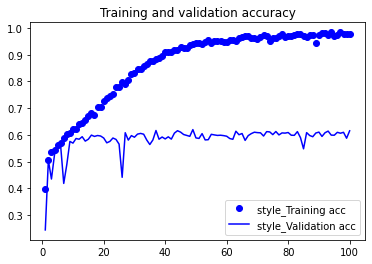

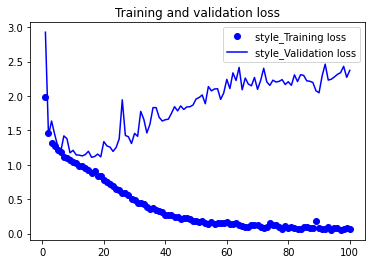

In [ ]:
#100epoch(batchnormalization + VGG finetuning + dropout + input scale (100 x 100))
import matplotlib.pyplot as plt

acc = history.history['style_accuracy'] 
val_acc = history.history['val_style_accuracy'] 
loss = history.history['style_loss'] 
val_loss = history.history['val_style_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='style_Training acc') 
plt.plot(epochs, val_acc, 'b', label='style_Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='style_Training loss') 
plt.plot(epochs, val_loss, 'b', label='style_Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

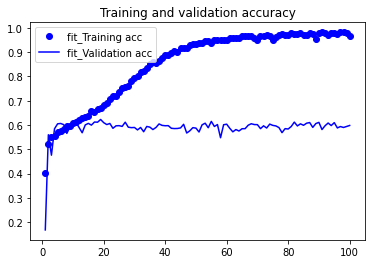

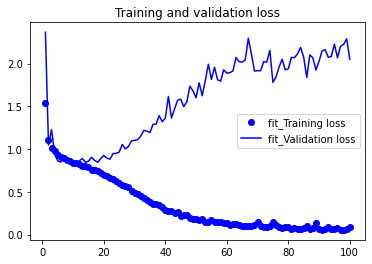

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['fit_accuracy'] 
val_acc = history.history['val_fit_accuracy'] 
loss = history.history['fit_loss'] 
val_loss = history.history['val_fit_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='fit_Training acc') 
plt.plot(epochs, val_acc, 'b', label='fit_Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='fit_Training loss') 
plt.plot(epochs, val_loss, 'b', label='fit_Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

최종 훈련 모델 (TRAINING + VALIDATION), 20epoch까지 학습.

In [ ]:
from pandas.core.dtypes.cast import maybe_infer_to_datetimelike
from keras.preprocessing.image import ImageDataGenerator

final_train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

final_training_set = final_train_datagen.flow_from_dataframe(data_top,
                                                 target_size = (100, 100),
                                                 x_col='파일경로',
                                                 y_col=['스타일','핏'],
                                                 batch_size = 64,
                                                 class_mode = 'multi_output')



Found 13366 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="파일경로". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

vgg_model = VGG16(weights='imagenet', input_shape=(100,100,3), include_top=False)

# vgg_model의 weigth freezing
for layer in vgg_model.layers[:-4]:
  layer.trainable = False

# vgg_model + add.layer
x = vgg_model.get_layer('block5_pool').output

x = layers.Flatten(name='new_flatten')(x)
branch_a=layers.Dense(units=256)(x)
branch_a=layers.BatchNormalization()(branch_a)
branch_a=layers.Activation('relu')(branch_a)
branch_a=layers.Dropout(0.5)(branch_a)
branch_a=layers.Dense(units=128)(branch_a)
branch_a=layers.BatchNormalization()(branch_a)
branch_a=layers.Dropout(0.5)(branch_a)


branch_b=layers.Dense(units=256)(x)
branch_b=layers.BatchNormalization()(branch_b)
branch_b=layers.Activation('relu')(branch_b)
branch_b=layers.Dropout(0.5)(branch_b)
branch_b=layers.Dense(units=128)(branch_b)
branch_b=layers.BatchNormalization()(branch_b)
branch_b=layers.Dropout(0.5)(branch_b)

# input을 가지고 나이, 수익, 성별을 모두 아웃풋으로 반환(3개를 예측)

style_prediction = layers.Dense(7, activation='softmax', name='style')(branch_a)
fit_prediction = layers.Dense(4, activation='softmax', name='fit')(branch_b)

model = Model(vgg_model.input,[style_prediction, fit_prediction])
model.compile(optimizer='adam', loss={'style':'sparse_categorical_crossentropy','fit':'sparse_categorical_crossentropy'}, metrics=['accuracy'])


history=model.fit_generator(final_training_set,
                         steps_per_epoch = 209,
                         epochs = 20)

model.save_weights('/content/gdrive/MyDrive/Colab Notebooks/딥러닝 term project/top_model.h5')

58900480/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
209/209 [==============================] - 6318s 30s/step - loss: 3.3575 - style_loss: 1.8829 - fit_loss: 1.4746 - style_accuracy: 0.4143 - fit_accuracy: 0.4374
Epoch 2/20
209/209 [==============================] - 79s 378ms/step - loss: 2.4588 - style_loss: 1.3880 - fit_loss: 1.0707 - style_accuracy: 0.5274 - fit_accuracy: 0.5309
Epoch 3/20
209/209 [==============================] - 79s 376ms/step - loss: 2.2317 - style_loss: 1.2629 - fit_loss: 0.9688 - style_accuracy: 0.5528 - fit_accuracy: 0.5611
Epoch 4/20
209/209 [==============================] - 78s 375ms/step - loss: 2.1324 - style_loss: 1.2061 - fit_loss: 0.9263 - style_accuracy: 0.5671 - fit_accuracy: 0.5768
Epoch 5/20
209/209 [==============================] - 78s 375ms/step - loss: 2.0570 - style_loss: 1.1589 - fit_loss: 0.8980 - style_accuracy: 0.5825 - fit_accuracy: 0.5863
Epoch 6/20
209/209 [==============================] - 79s 378ms/step - loss: 1.9902 - style_loss: 1.1162 - fit_loss: 0.8740 - style_accuracy

후보모델: ResNet + batchnormalization + dropout + (250 x 250 input shape )

In [ ]:
from pandas.core.dtypes.cast import maybe_infer_to_datetimelike
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_dataframe(top_train,
                                                 target_size = (250, 250),
                                                 x_col='파일경로',
                                                 y_col=['스타일','핏'],
                                                 batch_size = 64,
                                                 class_mode = 'multi_output')

test_set = test_datagen.flow_from_dataframe(top_val,
                                            target_size = (250, 250),
                                            x_col='파일경로',
                                            y_col=['스타일','핏'],
                                            batch_size = 64,
                                            class_mode = 'multi_output')


Found 10693 validated image filenames.
Found 2674 validated image filenames.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

resnet_model = ResNet50(weights='imagenet', input_shape=(250,250,3), include_top=False)

# resnet_model의 weigth freezing
for layer in resnet_model.layers[:]:
  layer.trainable = False

# resnet_model + add.layer
x = resnet_model.output

x = layers.Flatten(name='new_flatten')(x)
branch_a=layers.Dense(units=256)(x)
branch_a=layers.BatchNormalization()(branch_a)
branch_a=layers.Activation('relu')(branch_a)
branch_a=layers.Dropout(0.5)(branch_a)
branch_a=layers.Dense(units=128)(branch_a)
branch_a=layers.BatchNormalization()(branch_a)
branch_a=layers.Dropout(0.5)(branch_a)


branch_b=layers.Dense(units=256)(x)
branch_b=layers.BatchNormalization()(branch_b)
branch_b=layers.Activation('relu')(branch_b)
branch_b=layers.Dropout(0.5)(branch_b)
branch_b=layers.Dense(units=128)(branch_b)
branch_b=layers.BatchNormalization()(branch_b)
branch_b=layers.Dropout(0.5)(branch_b)

style_prediction = layers.Dense(7, activation='softmax', name='style')(branch_a)
fit_prediction = layers.Dense(4, activation='softmax', name='fit')(branch_b)

model = Model(resnet_model.input,[style_prediction, fit_prediction])
model.compile(optimizer='adam', loss={'style':'sparse_categorical_crossentropy','fit':'sparse_categorical_crossentropy'}, metrics=['accuracy'])


history=model.fit_generator(training_set,
                         steps_per_epoch = 168,
                         epochs = 100,
                         validation_data = test_set,
                         validation_steps = 42)

model.save_weights('/content/gdrive/MyDrive/Colab Notebooks/딥러닝 term project/multiout_model4.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
168/168 [==============================] - 3935s 23s/step - loss: 3.7991 - style_loss: 2.1592 - fit_loss: 1.6399 - style_accuracy: 0.3190 - fit_accuracy: 0.3817 - val_loss: 5.4564 - val_style_loss: 3.8811 - val_fit_loss: 1.5753 - val_style_accuracy: 0.1645 - val_fit_accuracy: 0.3826
Epoch 2/100
168/168 [==============================] - 187s 1s/step - loss: 2.9299 - style_loss: 1.6872 - fit_loss: 1.2427 - style_accuracy: 0.4207 - fit_accuracy: 0.4797 - val_loss: 2.6665 - val_style_loss: 1.5378 - val_fit_loss: 1.1287 - val_style_accuracy: 0.4402 - val_fit_accuracy: 0.5393
Epoch 3/100
168/168 [==============================] - 183s 1s/step - loss: 2.6669 - style_loss: 1.5344 - fit_loss: 1.1325 - style_accuracy: 0.4607 - fit_accuracy: 0.5063 - val_loss: 2.5458 - val_style_loss: 1.5293 - val_fit_loss: 1.0165 - val_style_accuracy: 0.4794 - val_fit_accuracy: 0.5344
Epoch 4/100
168/168 [==============================] - 183s 1s/step - loss: 2.5478 - style_loss: 1.4648 - fit_loss: 

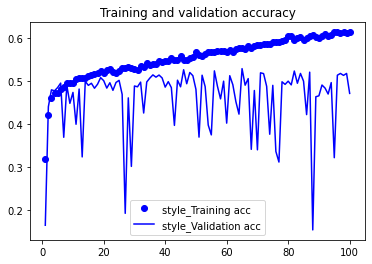

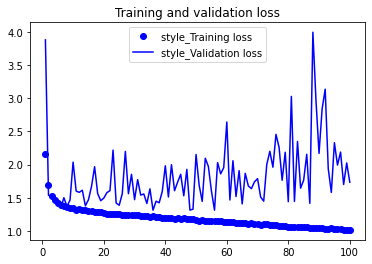

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['style_accuracy'] 
val_acc = history.history['val_style_accuracy'] 
loss = history.history['style_loss'] 
val_loss = history.history['val_style_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='style_Training acc') 
plt.plot(epochs, val_acc, 'b', label='style_Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='style_Training loss') 
plt.plot(epochs, val_loss, 'b', label='style_Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

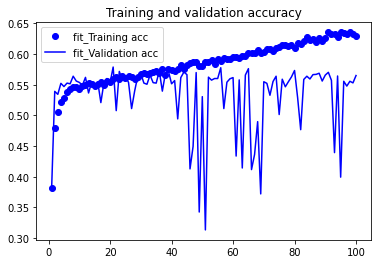

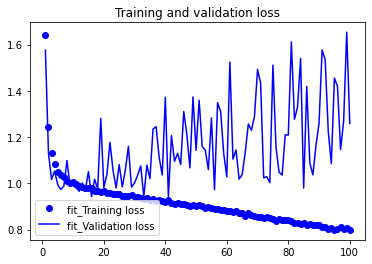

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['fit_accuracy'] 
val_acc = history.history['val_fit_accuracy'] 
loss = history.history['fit_loss'] 
val_loss = history.history['val_fit_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='fit_Training acc') 
plt.plot(epochs, val_acc, 'b', label='fit_Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='fit_Training loss') 
plt.plot(epochs, val_loss, 'b', label='fit_Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()